In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import polars as pl
import pyarrow
import fastparquet

# Path

In [2]:
path = r'/Users/mehreenbecker/4.3 IC Data Import and Descriptive Analysis/Original File'

# Importing Data

In [3]:
df_ords_prods_merge_custs = pl.read_parquet(os.path.join("df_ords_prods_merge_custs.parquet"))

# Checking Data

In [4]:
df_ords_prods_merge_custs.shape

(1000000, 41)

In [5]:
df_ords_prods_merge_custs.head()

product_id_x,product_name_x,aisle_id_x,department_id_x,prices_x,Unnamed: 0_x,order_id,order_number_x,orders_day_of_week_x,order_hour_of_day_x,days_since_prior_order_x,First_order_x,add_to_cart_order_x,reordered_x,price_range_loc_x,product_id_y,product_name_y,aisle_id_y,department_id_y,prices_y,Unnamed: 0_y,order_number_y,orders_day_of_week_y,order_hour_of_day_y,days_since_prior_order_y,First_order_y,add_to_cart_order_y,reordered_y,price_range,price_range_loc_y,busiest_day,busiest_days,busiest_period_of_day,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income
i64,str,i64,i64,f64,i64,i64,i64,i64,i64,f64,bool,i64,i64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,bool,f64,f64,str,str,str,str,str,i64,str,str,i64,str,i64,str,i64
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1987,3139998,28,6,11,3.0,false,5,0,"""Mid-range product""",1.0,"""Chocolate Sandwich Cookies""",61.0,19.0,5.8,1987.0,28.0,6.0,11.0,3.0,false,5.0,0.0,"""Mid-range product""","""Mid-range product""","""Regularly busy""","""Regular days""","""Most orders""",138,"""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1989,1977647,30,6,17,20.0,false,1,1,"""Mid-range product""",1.0,"""Chocolate Sandwich Cookies""",61.0,19.0,5.8,1989.0,30.0,6.0,17.0,20.0,false,1.0,1.0,"""Mid-range product""","""Mid-range product""","""Regularly busy""","""Regular days""","""Average orders""",138,"""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,11433,389851,2,0,21,6.0,false,20,0,"""Mid-range product""",1.0,"""Chocolate Sandwich Cookies""",61.0,19.0,5.8,11433.0,2.0,0.0,21.0,6.0,false,20.0,0.0,"""Mid-range product""","""Mid-range product""","""Busiest day""","""Busiest days""","""Average orders""",709,"""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302
1,"""Chocolate Sandwich Cookies""",61,19,5.8,11433,389851,2,0,21,6.0,false,20,0,"""Mid-range product""",587.0,"""Air Effects Gain Island Fresh""",101.0,17.0,3.1,11433.0,2.0,0.0,21.0,6.0,false,25.0,0.0,"""Low-range product""","""Low-range product""","""Busiest day""","""Busiest days""","""Average orders""",709,"""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302
1,"""Chocolate Sandwich Cookies""",61,19,5.8,11433,389851,2,0,21,6.0,false,20,0,"""Mid-range product""",1519.0,"""Thin Pizza Crust""",105.0,13.0,5.2,11433.0,2.0,0.0,21.0,6.0,false,16.0,0.0,"""Mid-range product""","""Mid-range product""","""Busiest day""","""Busiest days""","""Average orders""",709,"""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302


# Converting Database to Pandas

In [7]:
order_hour_of_day = df_ords_prods_merge_custs.select('order_hour_of_day_x').to_pandas()

# Checking Data

In [8]:
order_hour_of_day.head()

,order_hour_of_day_x
0,11
1,17
2,21
3,21
4,21


In [11]:
# Importing Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Creating the Histogram

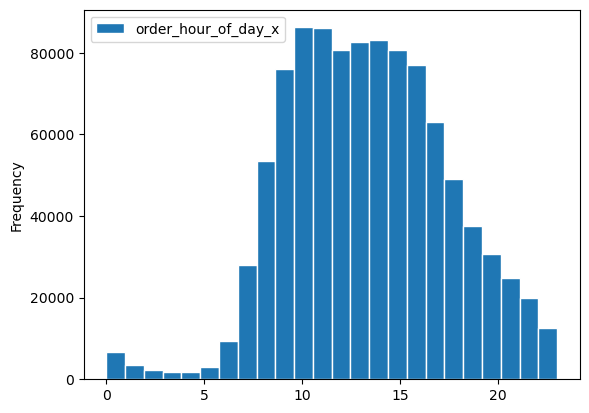

In [12]:
hist = order_hour_of_day.plot.hist(bins = 24, edgecolor='white')

In [15]:
## The histogram shows that there's not much activity between midnight to 6 am. After 6 am, there's an increase in activity.
## The activity is at it's highest at 10 am and 11 am.
## From 12 pm to 4 pm, it's fairly steady, with a consistent decrease from 6 pm till 11 pm.

In [20]:
df_ords_prods_merge_custs.loc[df_ords_prods_merge_custs["max_order"] > 40, "loyalty_flag"] = "Loyal Customer"
df_ords_prods_merge_custs.loc[
    (df_ords_prods_merge_custs["max_order"] <= 40) & (df_ords_prods_merge_custs["max_order"] > 10), "loyalty_flag"
] = "Regular customer"
df_ords_prods_merge_custs.loc[df_ords_prods_merge_custs["max_order"] <= 10, "loyalty_flag"] = "New customer"

KeyError: 'max_order'

In [22]:
df_ords_prods_merge_custs["max_order"] = (
    df_ords_prods_merge_custs.groupby("user_id")["order_number_x"].transform("max")
)

KeyError: 'user_id'

In [19]:
df_ords_prods_merge_custs = pd.DataFrame(df_ords_prods_merge_custs)

# Converting Data for Creating a Bar Chart

In [16]:
loyalty_flag = df_ords_prods_merge_custs.select('loyalty_flag').to_pandas()

ColumnNotFoundError: unable to find column "loyalty_flag"; valid columns: ["product_id_x", "product_name_x", "aisle_id_x", "department_id_x", "prices_x", "Unnamed: 0_x", "order_id", "order_number_x", "orders_day_of_week_x", "order_hour_of_day_x", "days_since_prior_order_x", "First_order_x", "add_to_cart_order_x", "reordered_x", "price_range_loc_x", "product_id_y", "product_name_y", "aisle_id_y", "department_id_y", "prices_y", "Unnamed: 0_y", "order_number_y", "orders_day_of_week_y", "order_hour_of_day_y", "days_since_prior_order_y", "First_order_y", "add_to_cart_order_y", "reordered_y", "price_range", "price_range_loc_y", "busiest_day", "busiest_days", "busiest_period_of_day", "user_id", "gender", "state", "age", "date_joined", "number_of_dependants", "marital_status", "income"]